## A track example

The file `times.dat` has made up data for 100-m races between Florence Griffith-Joyner and Shelly-Ann Fraser-Pryce. 

We want to understand how often Shelly-Ann beats Flo-Jo.

In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


<!-- Secret comment:
How the data were generated
w = np.random.normal(0,.07,10000)
x = np.random.normal(10.65,.02,10000)+w
y = np.random.normal(10.7,.02,10000)+w
np.savetxt('times.dat', (x,y), delimiter=',')
-->

In [2]:
florence, shelly = np.loadtxt('times.dat', delimiter=',')

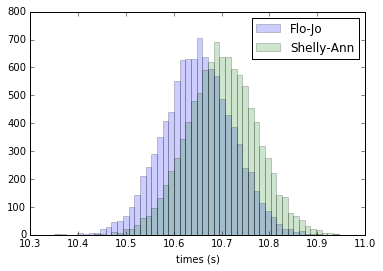

In [3]:
counts, bins, patches = plt.hist(florence,bins=50,alpha=0.2, label='Flo-Jo')
counts, bins, patches = plt.hist(shelly,bins=bins,alpha=0.2, label='Shelly-Ann')
plt.legend()
plt.xlabel('times (s)')

In [4]:
np.mean(florence), np.mean(shelly)

(10.64984971048745, 10.699829543395099)

In [5]:
np.std(florence),np.std(shelly)

(0.073163889088267695, 0.073028322568524776)

## let's make a prediction 

Based on the mean and std. of their times, let's make a little simulation to predict how often Shelly-Ann beats Flo-Jo.

We can use propagation of errors to predict mean and standard deviation for $q=T_{shelly}-T_{Florence}$

In [9]:
mean_q = np.mean(shelly)-np.mean(florence)

In [66]:
sigma_q = np.sqrt(np.std(florence)**2+np.std(shelly)**2)

In [69]:
f_guess = np.random.normal(np.mean(florence),np.std(florence),10000)
s_guess = np.random.normal(np.mean(shelly),np.std(shelly),10000)
toy_difference = s_guess-f_guess

Make Toy data

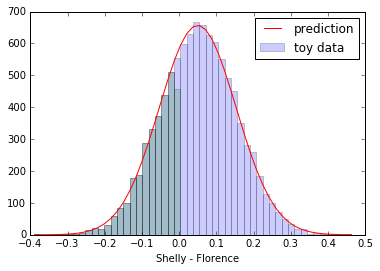

In [70]:
#toy_difference = np.random.normal(mean_q, sigma_q, 10000)
counts, bins, patches = plt.hist(toy_difference,bins=50, alpha=0.2, label='toy data')
counts, bins, patches = plt.hist(toy_difference[toy_difference<0],bins=bins, alpha=0.2)
norm = (bins[1]-bins[0])*10000
plt.plot(bins,norm*mlab.normpdf(bins,mean_q,sigma_q), label='prediction')
plt.legend()
plt.xlabel('Shelly - Florence')

In [71]:
# predict fraction of wins
np.sum(toy_difference<0)/10000.

0.31080000000000002

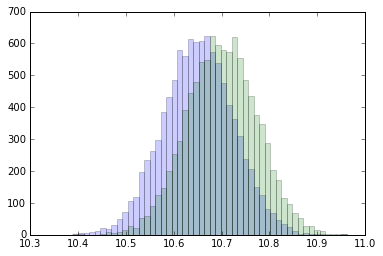

In [63]:
#check toy data looks like real data
counts, bins, patches = plt.hist(f_guess,bins=50,alpha=0.2)
counts, bins, patches = plt.hist(s_guess,bins=bins,alpha=0.2)

## How often does she actually win?

0.0366

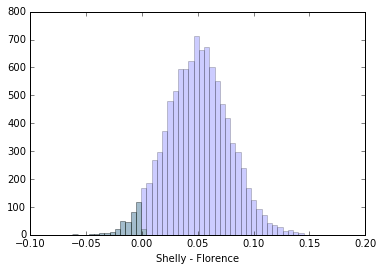

In [65]:
counts, bins, patches = plt.hist(shelly-florence,bins=50,alpha=0.2)
counts, bins, patches = plt.hist((shelly-florence)[florence-shelly>0],bins=bins,alpha=0.2)
plt.xlabel('Shelly - Florence')

1.*np.sum(florence-shelly>0)/florence.size


## What's gonig on?

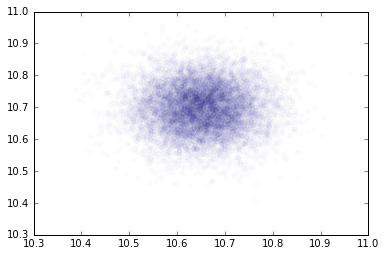

In [64]:
plt.scatter(f_guess,s_guess, alpha=0.01)

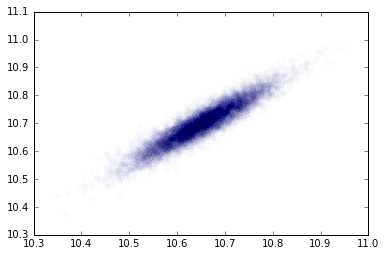

In [73]:
plt.scatter(florence,shelly, alpha=0.01)

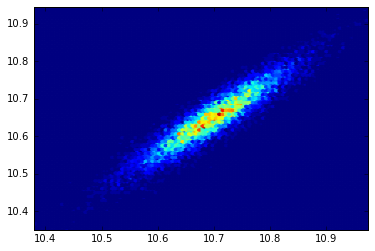

In [11]:
plt.hexbin(shelly,florence, alpha=1)

Previously we learned propagation of errors formula neglecting correlation:

$\sigma_q^2 = \left( \frac{\partial q}{ \partial x} \sigma_x \right)^2 + \left( \frac{\partial q}{ \partial y}\, \sigma_y \right)^2 = \frac{\partial q}{ \partial x} \frac{\partial q}{ \partial x} C_{xx} + \frac{\partial q}{ \partial y} \frac{\partial q}{ \partial y} C_{yy}$

Now we need to extend the formula to take into account correlation

$\sigma_q^2   = \frac{\partial q}{ \partial x} \frac{\partial q}{ \partial x} C_{xx} + \frac{\partial q}{ \partial y} \frac{\partial q}{ \partial y} C_{yy} + 2 \frac{\partial q}{ \partial x} \frac{\partial q}{ \partial y} C_{xxy} $



In [37]:
# covariance matrix
cov_matrix = np.cov(shelly,florence)
cov_matrix

array([[ 0.00533367,  0.00494895],
       [ 0.00494895,  0.00535349]])

In [36]:
# normalized correlation matrix
np.corrcoef(shelly,florence)

array([[ 1.        ,  0.92615128],
       [ 0.92615128,  1.        ]])

In [38]:
# q = T_shelly - T_florence
# x = T_shelly
# y = T_florence
# propagation of errors
cov_matrix[0,0]+cov_matrix[1,1]-2*cov_matrix[0,1]

0.00078925010111676255

In [78]:
mean_q = np.mean(shelly)-np.mean(florence)
sigma_q_with_corr = np.sqrt(cov_matrix[0,0]+cov_matrix[1,1]-2*cov_matrix[0,1])
sigma_q_no_corr = np.sqrt(cov_matrix[0,0]+cov_matrix[1,1])

0.0366

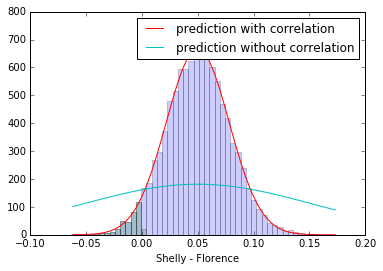

In [80]:
counts, bins, patches = plt.hist(shelly-florence,bins=50,alpha=0.2)
counts, bins, patches = plt.hist((shelly-florence)[florence-shelly>0],bins=bins,alpha=0.2)
norm = (bins[1]-bins[0])*10000
plt.plot(bins,norm*mlab.normpdf(bins,mean_q,sigma_q_with_corr), label='prediction with correlation')
plt.plot(bins,norm*mlab.normpdf(bins,mean_q, sigma_q_no_corr), label='prediction without correlation')
plt.legend()
plt.xlabel('Shelly - Florence')

1.*np.sum(florence-shelly>0)/florence.size

